# Imports and Setup

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

plt.rcParams["image.cmap"] = "gray"
from autoencoder import *

2023-04-06 14:10:18.440588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dense Autoencoder

## Creating the Autoencoder Model

We will be using the MNIST digits dataset at first. The 28x28 image grid will be flatten and it will be fed to the model. The encoder will have two dense layers with 128 and 64 neurons. The encoding shape is 49 which can be realized by using 49 nueroned bottleneck. The deocder will then have 64 and 128 neurons and it will output in the same shape the the input to the model.

In [2]:
input_shape = 784
encoding_shape = 49
neurons = [128, 64]
activation = "relu"
ae = AutoEncoder(input_shape)
ae.build(neurons = neurons, encoding_shape=encoding_shape)
ae.summary()

2023-04-06 14:10:27.060791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "Dense_Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 128)               100480    
                                                                 
 encoder_dense_2 (Dense)     (None, 64)                8256      
                                                                 
 bottleneck (Dense)          (None, 49)                3185      
                                                                 
 decoder_dense_1 (Dense)     (None, 64)                3200      
                                                                 
 decoder_dense_2 (Dense)     (None, 128)               8320      
                                                                 
 decoder_output (Dense)      (None, 784)         

So, we have the model which we specified. Next, let's compile it. We'll use Adam optimizer and MSE error.

In [11]:
ae.compile(optimizer="adam", loss="mse")

## Dataset for the model

We are using the MNIST digits dataset. Let's load it:

In [4]:
X_train, X_test = tfds.load("mnist", split=["train", "test"], as_supervised=True)

X_train = X_train.map(lambda x, y: x)
X_train = X_train.map(lambda x: tf.cast(x, tf.float32))
X_train = X_train.map(lambda x: (x / 255.0))
X_train = X_train.map(lambda x: tf.reshape(x, (784,)))

X_train = X_train.map(lambda x: (x, x))
X_train = X_train.batch(32).shuffle(1000).prefetch(1)

X_test = X_test.map(lambda x, y: x)
X_test = X_test.map(lambda x: tf.cast(x, tf.float32))
X_test = X_test.map(lambda x: (x / 255.0))
X_test = X_test.map(lambda x: tf.reshape(x, (784,)))

X_test = X_test.map(lambda x: (x, x))
X_test = X_test.batch(32).prefetch(1)

tfds.benchmark(X_train, batch_size=32)
tfds.benchmark(X_test, batch_size=32)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089



************ Summary ************



  0%|          | 0/1875 [00:00<?, ?it/s]

Examples/sec (First included) 13962.92 ex/sec (total: 60032 ex, 4.30 sec)
Examples/sec (First only) 13.70 ex/sec (total: 32 ex, 2.34 sec)
Examples/sec (First excluded) 30543.98 ex/sec (total: 60000 ex, 1.96 sec)

************ Summary ************



  0%|          | 0/313 [00:00<?, ?it/s]

Examples/sec (First included) 12233.05 ex/sec (total: 10048 ex, 0.82 sec)
Examples/sec (First only) 201.97 ex/sec (total: 32 ex, 0.16 sec)
Examples/sec (First excluded) 15108.44 ex/sec (total: 10016 ex, 0.66 sec)


,duration,num_examples,avg
first+lasts,0.821381,10048,12233.050680
first,0.158441,32,201.968538
lasts,0.662941,10016,15108.436739


Note that we have done some preprocessing as well as batch the dataset. Also note that the input data to the model will be in form of `(X_train, X_train)` which is what we have done.

## Training Dense Autoencoder

We'll train the model:

In [12]:
history = ae.fit(X_train, epochs=1, validation_data=X_test, verbose=1)

1875/1875 [==============================] - 18s 8ms/step - loss: 0.0105 - val_loss: 0.0097


Let's see how well the model is performing by visualizing some images, their encoded version and decoded versions:

In [9]:
random_images = list(X_train.take(1))[0][0]

/media/hari31416/Hari_SSD/Users/harik/Desktop/ReVision/ReVision/generative/autoencoder/autoencoder.py:652: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


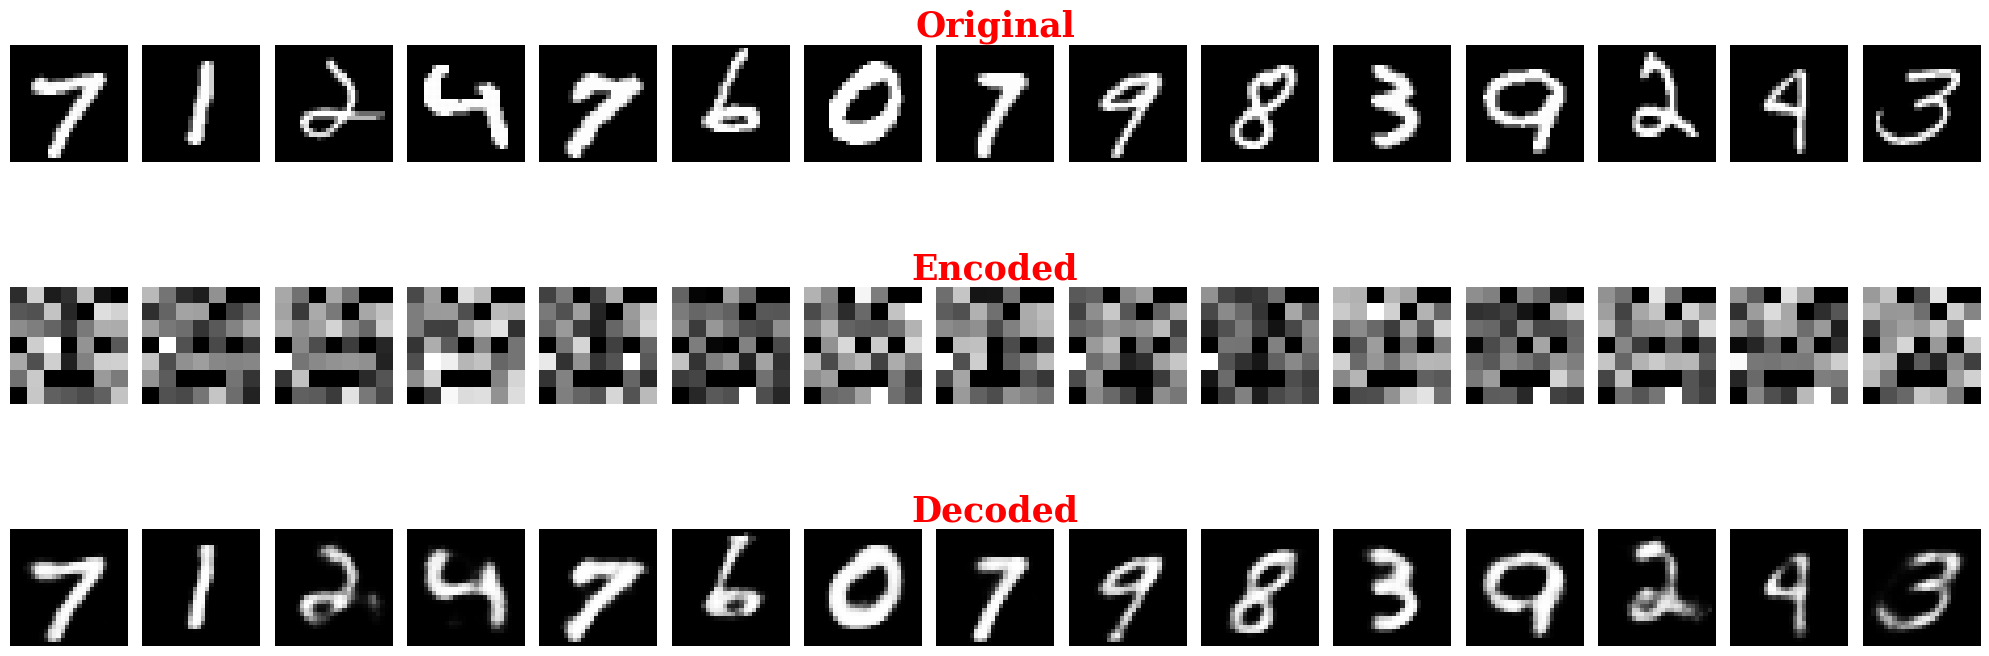

In [10]:
res = ae.evaluate(random_images, (28, 28), (7,7), num_images = 15)

We can see that even an encoding of 7x7 is very good for decoding.

Next, we'll use the convolutional encoder and will see how it performs.

# Convolutional Autoencoder

In [9]:
ae = AutoEncoder((28, 28, 1))
filters = [32, 64]
ae.build(filters=filters, kernels=3)
ae.summary()

Model: "Conv_Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 encoder_1_conv1 (Conv2D)    (None, 28, 28, 32)        320       
                                                                 
 encoder_1_conv2 (Conv2D)    (None, 28, 28, 32)        9248      
                                                                 
 encoder_1_pool (MaxPooling2  (None, 14, 14, 32)       0         
 D)                                                              
                                                                 
 encoder_2_conv1 (Conv2D)    (None, 14, 14, 64)        18496     
                                                                 
 encoder_2_conv2 (Conv2D)    (None, 14, 14, 64)        36928     
                                                  

In [10]:
ae.compile(optimizer="adam", loss = "mse")

In [11]:
X_train, X_test = tfds.load("mnist", split=["train", "test"], as_supervised=True)

X_train = X_train.map(lambda x, y: x)
X_train = X_train.map(lambda x: tf.cast(x, tf.float32))
X_train = X_train.map(lambda x: (x / 255.0))
X_train = X_train.map(lambda x: tf.reshape(x, (28,28,1)))

X_train = X_train.map(lambda x: (x, x))
X_train = X_train.batch(32).shuffle(1000).prefetch(1)

X_test = X_test.map(lambda x, y: x)
X_test = X_test.map(lambda x: tf.cast(x, tf.float32))
X_test = X_test.map(lambda x: (x / 255.0))
X_test = X_test.map(lambda x: tf.reshape(x, (28,28,1)))

X_test = X_test.map(lambda x: (x, x))
X_test = X_test.batch(32).prefetch(1)

tfds.benchmark(X_train, batch_size=32)
tfds.benchmark(X_test, batch_size=32)



************ Summary ************



  0%|          | 0/1875 [00:00<?, ?it/s]

Examples/sec (First included) 7391.57 ex/sec (total: 60032 ex, 8.12 sec)
Examples/sec (First only) 7.42 ex/sec (total: 32 ex, 4.31 sec)
Examples/sec (First excluded) 15750.13 ex/sec (total: 60000 ex, 3.81 sec)

************ Summary ************



  0%|          | 0/313 [00:00<?, ?it/s]

Examples/sec (First included) 7416.68 ex/sec (total: 10048 ex, 1.35 sec)
Examples/sec (First only) 389.80 ex/sec (total: 32 ex, 0.08 sec)
Examples/sec (First excluded) 7869.94 ex/sec (total: 10016 ex, 1.27 sec)


,duration,num_examples,avg
first+lasts,1.354784,10048,7416.681228
first,0.082093,32,389.802370
lasts,1.272691,10016,7869.938734


In [12]:
history = ae.fit(X_train, epochs=10, validation_data=X_test, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 25s 8ms/step - loss: 0.0077 - val_loss: 0.0046
Epoch 2/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 3/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 4/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 5/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 6/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/10
1875/1875 [==============================] - 19s 9ms/step - l

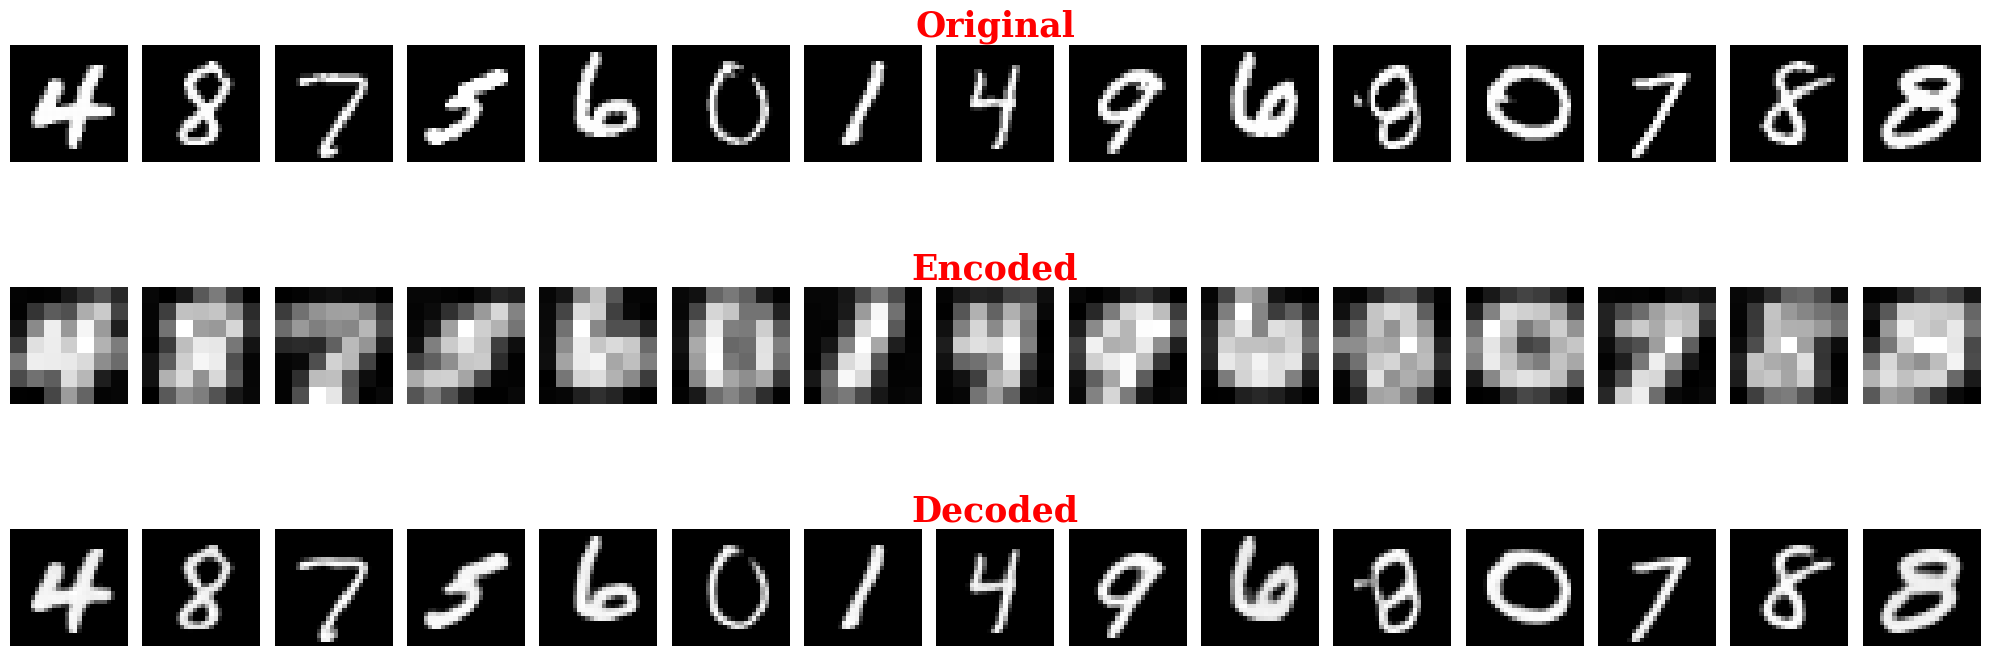

In [13]:
random_images = list(X_train.take(1))[0][0]
res = ae.evaluate(random_images, (28, 28), (7,7), num_images = 15)

These are much better than the dense autoencoder!